<a href="https://colab.research.google.com/github/dassangita844/Climate-data-analysis-Delhi-/blob/main/Delhi_climate_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Delhi's daily climate time series data**

### *Sangita Das*

## **Introduction**
This project analyzes Delhi's daily climate data, spanning from January 1st, 2013, to April 24th, 2017. As one of the world's most populous and rapidly growing cities, Delhi's climate has significant implications for public health, urban planning, and sustainability. By examining detailed weather patterns over this four-year period, we can uncover trends and insights that may inform decision-making related to climate resilience and infrastructure development.

## **Objectives**

This project aims to extract meaningful patterns and relationships from the climate data, paving the way for more informed and effective strategies to cope with climate challenges in Delhi. The key goal of the codebook is
- To understand the pattern of Delhi's climate data over time.
- To predict daily temperatures based on other weather factors like humidity, wind speed, and pressure using different machine learning approaches and compare them to get the best fitted model.


##**Data Overview**
The dataset consists of four key meteorological features, providing a comprehensive view of daily weather conditions in Delhi:

- Mean temperature averaged out from multiple 3 hour intervals in a day (meantemp)
- Humidity value for the day (units are grams of water vapor per cubic meter volume of air) (humidity)
- Wind speed measured in kmph (wind_speed)
- Pressure reading of weather (measure in atm) (meanpressure)

## **Data Source**

The weather data for Delhi has been sourced from the Weather Underground API, providing reliable daily weather observations. This dataset is publicly available on Kaggle, accessible via the following link: [Kaggle - Daily Climate Time Series Data](https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data/data). Users can download both the training and test datasets from the Kaggle page. Additionally, detailed descriptions of the datasets are available at the following links:
- [Train Data](https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data/data?select=DailyDelhiClimateTrain.csv)
- [Test Data](https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data/data?select=DailyDelhiClimateTest.csv)


## **Import necessary packages**
Here, necessary packages for the data analysis and machine learning tasks, are imported. These tools are important for efficient data processing, visualization, and model building.

In [1]:
# Data visualization and plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Data manipulation and numerical operations
import numpy as np
import pandas as pd

# Scikit-learn for machine learning models and utilities
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.feature_selection import mutual_info_regression
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV, KFold, cross_validate, train_test_split, learning_curve
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn import set_config

# Variance Inflation Factor calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import warnings
import warnings


## **Data**


### **Read the train and test data**


In [2]:
# read the data
df_train = pd.read_csv('DailyDelhiClimateTrain.csv')
df_test = pd.read_csv('DailyDelhiClimateTest.csv')


## **Train data**

### **Explore the train data**

In [3]:
# copy the data
climate_train_df = df_train.copy()

# shape of the data
print(f'The shape of the train data is: {climate_train_df.shape}')

# columns detail
print(f'\nThe columns of the train data are:\n{climate_train_df.columns}')

# first five rows of the data
print(f'\nThe first few rows of the train data are:\n{climate_train_df.head()}')

# displays column names, data types, and non-null counts
print('\nTrain Data information:')
climate_train_df.info()

# summary statistics
print(f'\nSummary statistics of train data:\n{climate_train_df.describe()}')

The shape of the train data is: (1462, 5)

The columns of the train data are:
Index(['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')

The first few rows of the train data are:
         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000

Train Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null

With the help of above code, we explore the (a) shape of the train data (b) columns of train data (c) first few rows of train data (d) data types and (e) summary statistics.

### **Visualization before data preprocessing**

#### **Histogram**

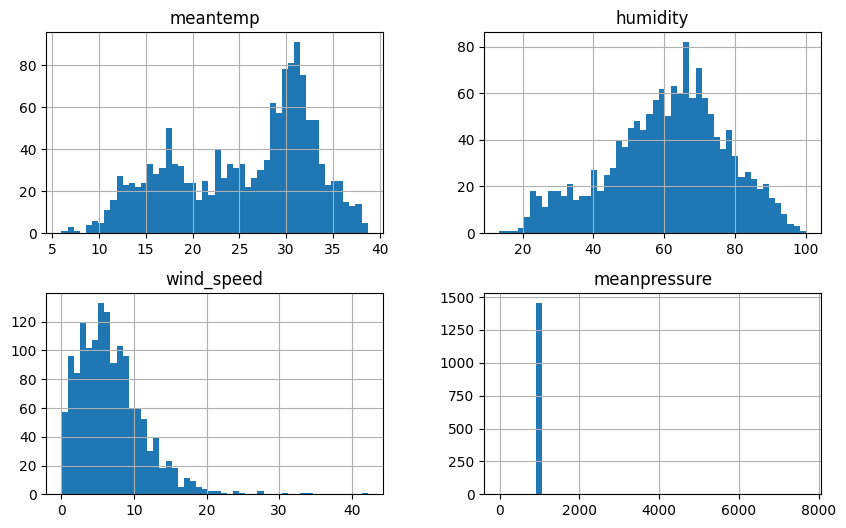

In [4]:
# histogram for distribution
climate_train_df.hist(bins=50, figsize=(10,6))
plt.show()

A histogram represents the distribution of data, showing how many data points fall within each bin. It provides a quick way to visualize the data's underlying patterns, making it easier to understand the overall distribution at a glance.

#### **Pairplot**


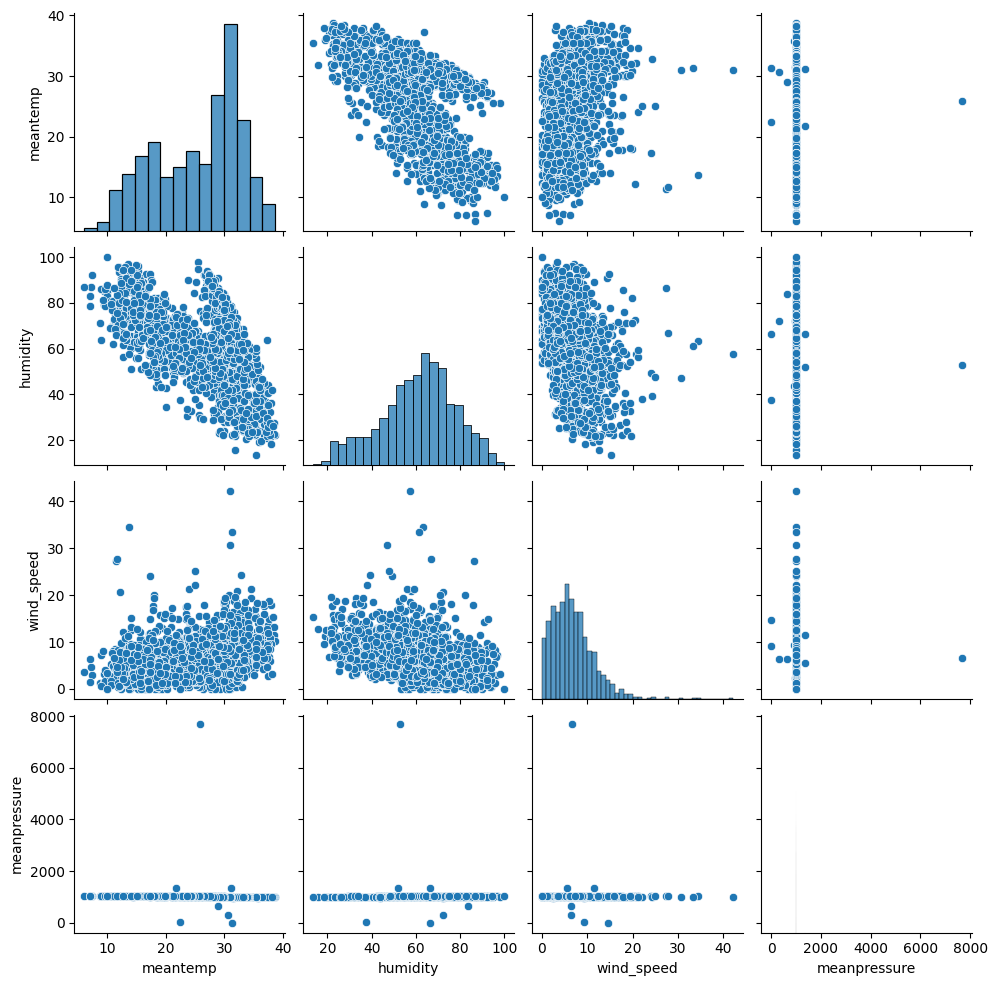

In [5]:
# pairplot of all numerical variables
sns.pairplot(climate_train_df)

In a pair plot, each variable is plotted against every other variable, allowing for a clear view of relationships, trends, or patterns among the variables.

#### **Visualization the data**

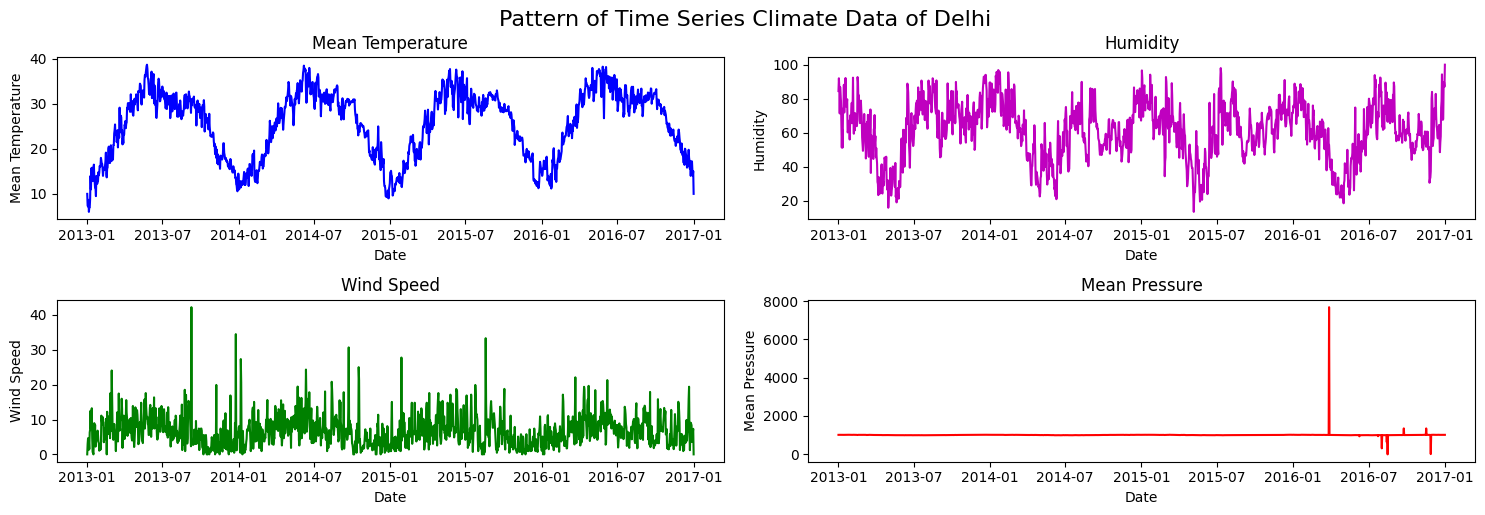

In [6]:
import matplotlib.pyplot as plt

# Convert the 'date' column to datetime if not already done
climate_train_df['date'] = pd.to_datetime(climate_train_df['date'])

# Define the figure and subplots (2 rows, 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(15, 5))

# Plot each feature in a separate subplot with different colors
axs[0, 0].plot(climate_train_df['date'], climate_train_df['meantemp'], color='b')
axs[0, 0].set_title('Mean Temperature')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Mean Temperature')

axs[0, 1].plot(climate_train_df['date'], climate_train_df['humidity'], color='m')
axs[0, 1].set_title('Humidity')
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('Humidity')

axs[1, 0].plot(climate_train_df['date'], climate_train_df['wind_speed'], color='g')
axs[1, 0].set_title('Wind Speed')
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('Wind Speed')

axs[1, 1].plot(climate_train_df['date'], climate_train_df['meanpressure'], color='r')
axs[1, 1].set_title('Mean Pressure')
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('Mean Pressure')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.suptitle('Pattern of Time Series Climate Data of Delhi', fontsize=16, y=1.02)
plt.show()



The visualization reveals that certain variables, such as 'wind_speed' and 'meanpressure', contain outliers. It is essential to review all variables and preprocess them as needed.

### **Data Preprocessing of train data**

#### **Missing and duplicate data**

In [7]:
# check for duplicate data
print(f'\nDuplicate data: {climate_train_df.duplicated().sum()}')

# check the missing data
print(f'\nMissing values:\n{climate_train_df.isnull().sum()}')


Duplicate data: 0

Missing values:
date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64


The training dataset contains no duplicate or missing data.

#### **Process the Outliers**


In [8]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

class TrainOutlierProcessor(BaseEstimator, TransformerMixin):
    def __init__(self, columns, threshold=2, window_size=30):
        self.columns = columns
        self.threshold = threshold
        self.window_size = window_size
        self.outliers = {}
        self.bounds = {}
        self.input_data = {}
        self.output_data = {}

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy, self.outliers, self.bounds = self.detect_and_process_local_outliers(X_copy, self.columns)
        return X_copy

    def detect_and_process_local_outliers(self, X, columns):
        X_copy = X.copy()
        outliers_dict = {}
        bounds_dict = {}

        for col in columns:
            self.input_data[col] = X_copy[col].copy()  # Store the input data for this column

            # Step 1: Compute initial rolling statistics (mean, std) and bounds
            rolling_mean = X_copy[col].rolling(window=self.window_size, min_periods=1, center=True).mean()
            rolling_std = X_copy[col].rolling(window=self.window_size, min_periods=1, center=True).std()

            lower_bounds = rolling_mean - self.threshold * rolling_std
            upper_bounds = rolling_mean + self.threshold * rolling_std
            bounds_dict[col] = (lower_bounds, upper_bounds)

            # Step 2: Detect outliers using z-scores
            z_scores = (X_copy[col] - rolling_mean) / rolling_std
            outlier_mask = np.abs(z_scores) > self.threshold
            outliers_dict[col] = X_copy.loc[outlier_mask, col].dropna().index.tolist()

            # Step 3: Recompute rolling statistics excluding detected outliers
            for index in outliers_dict[col]:
                # Temporarily exclude the outlier from the column data for recomputation
                temp_data = X_copy[col].copy()
                temp_data.loc[index] = np.nan  # Exclude the outlier by setting it to NaN temporarily

                # Recompute rolling mean and std excluding the outlier
                rolling_mean_excluded = temp_data.rolling(window=self.window_size, min_periods=1, center=True).mean()
                rolling_std_excluded = temp_data.rolling(window=self.window_size, min_periods=1, center=True).std()

                # Recompute bounds excluding the outlier
                lower_bounds_excluded = rolling_mean_excluded - self.threshold * rolling_std_excluded
                upper_bounds_excluded = rolling_mean_excluded + self.threshold * rolling_std_excluded

                bounds_dict[col] = (lower_bounds_excluded, upper_bounds_excluded)

                # Adjust the outlier by setting it to the closest bound
                if abs(X_copy.loc[index, col] - lower_bounds_excluded.iloc[index]) < abs(upper_bounds_excluded.iloc[index] - X_copy.loc[index, col]):
                    X_copy.loc[index, col] = lower_bounds_excluded.iloc[index]
                else:
                    X_copy.loc[index, col] = upper_bounds_excluded.iloc[index]

            self.output_data[col] = X_copy[col].copy()  # Store the output data for this column

        self.outliers = outliers_dict
        self.bounds = bounds_dict
        return X_copy, self.outliers, self.bounds

    def get_local_outliers_indices(self, column):
        return self.outliers.get(column, [])

    def get_bounds(self, column):
        return self.bounds.get(column, (None, None))

    def get_input_data(self, column):
        return self.input_data.get(column, None)

    def get_output_data(self, column):
        return self.output_data.get(column, None)


In [9]:
# Apply the function to each variable
climate_train_data = climate_train_df.copy()  # Make a copy to avoid modifying the original

columns = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']
train_outlier_processor = TrainOutlierProcessor(columns)
climate_train_data = train_outlier_processor.fit_transform(climate_train_data)
#for col in ['meantemp', 'humidity', 'wind_speed', 'meanpressure']:
#    climate_train_data = process_outliers_zscore(climate_train_data, col)

# Check how many rows remain after outlier removal
print(climate_train_data.shape)

(1462, 5)


#### **Visualize the local outliers**

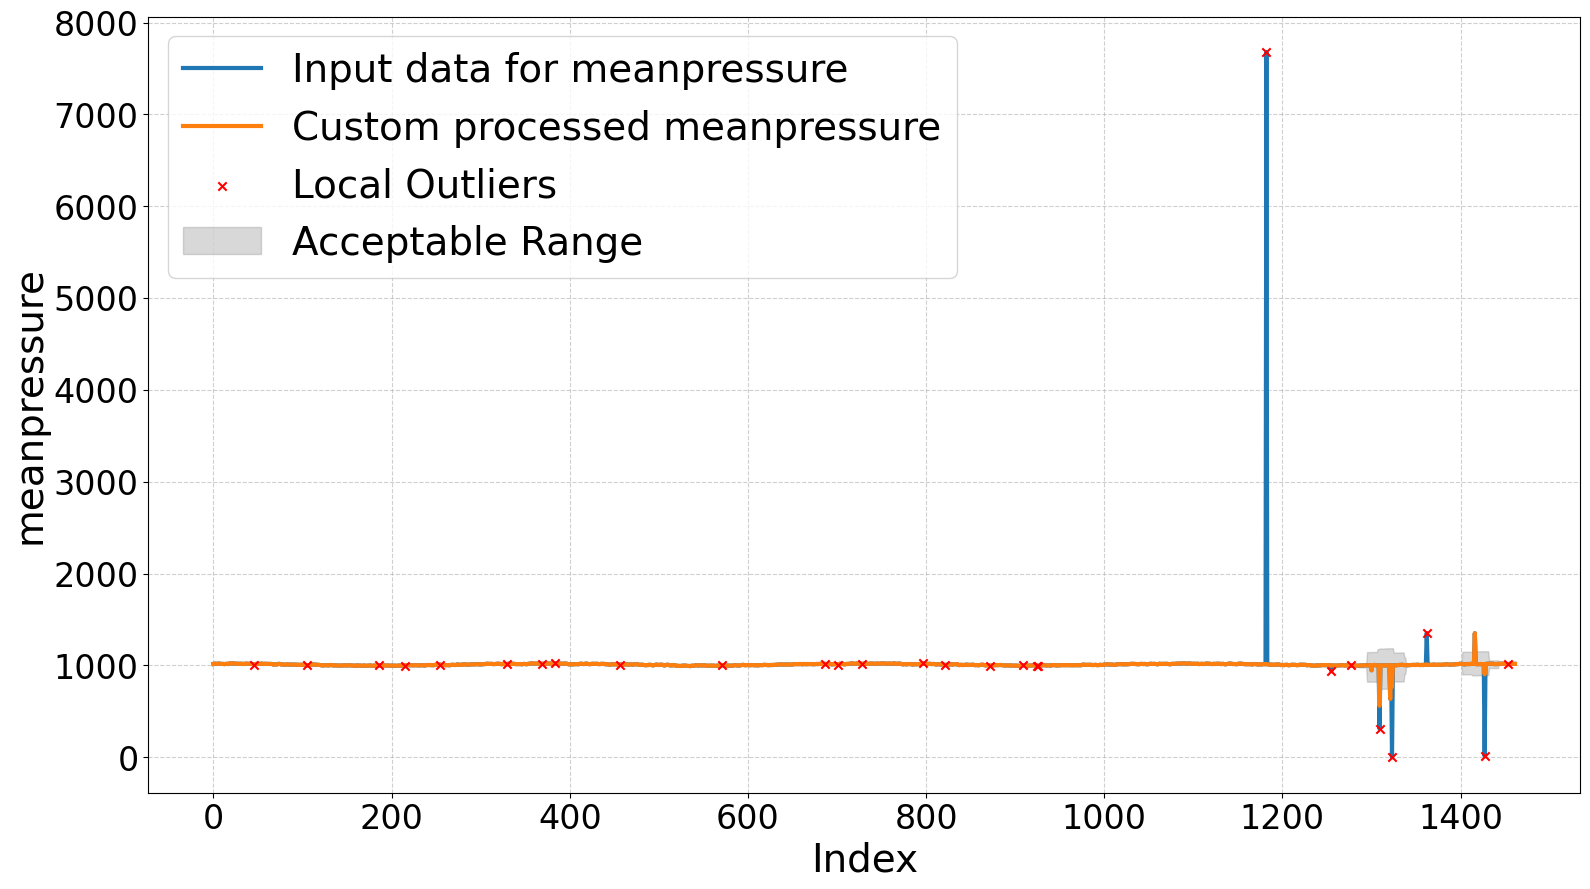

In [10]:
# Visualizing local outliers detection and processing

def plot_local_outlier_processing(original_data, processed_data, column, outlier_processor, save_path, left_range=400, right_range=1000):

    # Get the input and output data of the outlier processor for the column
    input_data = outlier_processor.get_input_data(column)
    output_data = outlier_processor.get_output_data(column)

    # Get the indices of the local outliers for the column
    outlier_indices = outlier_processor.get_local_outliers_indices(column)

    # Filter the outlier indices to be within the specified range
    filtered_outlier_indices = [idx for idx in outlier_indices if left_range <= (idx - input_data.index[0]) <= right_range]

    # Get the bounds for the column
    lower_bound, upper_bound = outlier_processor.get_bounds(column)

    # Set the figure size
    fig, ax = plt.subplots(figsize=(16, 9))

    # Plot the data with increased line width
    ax.plot(input_data.loc[left_range:right_range], label=f"Input data for {column}", linewidth=3)
    ax.plot(output_data.loc[left_range:right_range], label=f"Custom processed {column}", linewidth=3)

    # Highlight the outliers
    plt.scatter(filtered_outlier_indices, input_data.loc[filtered_outlier_indices], marker='x', color='red', label='Local Outliers', zorder=5)

    # Add shaded area for the bounds
    plt.fill_between(input_data.loc[left_range:right_range].index, lower_bound.loc[left_range:right_range], upper_bound.loc[left_range:right_range], color='gray', alpha=0.3, label='Acceptable Range')

    # Add legend with larger font size and bold labels
    ax.legend(fontsize=28)

    # Add grid
    ax.grid(True, linestyle='--', alpha=0.6)

    # Add axis labels with larger font size and bold text
    ax.set_xlabel('Index', fontsize=28)
    ax.set_ylabel(f"{column}", fontsize=28)

    # Customize ticks
    ax.tick_params(axis='both', which='major', labelsize=24)
    ax.yaxis.offsetText.set_fontsize(24)

    # Save the plot with high resolution
    plt.tight_layout()
    plt.savefig(save_path, format='pdf')

    # Display the plot
    plt.show()

# Call the function to generate and save the plot

plot_local_outlier_processing(
    climate_train_df,
    climate_train_data,
    column='meanpressure',
    outlier_processor=train_outlier_processor,
    save_path='local_outlier_processing_plot_meanpressure.pdf',
    left_range=0,
    right_range=1462
)


In this case, I applied local outlier processing. However, even after removing local outliers from the 'meanpressure' variable in the training data, the values appeared unrealistic. To address this, I manually removed values at specific indices (1182, 1255, 1300, 1309, 1321, 1323, 1362, 1416, and 1427) in 'meanpressure', replaced them with NaN, and then performed linear interpolation to smooth the data.

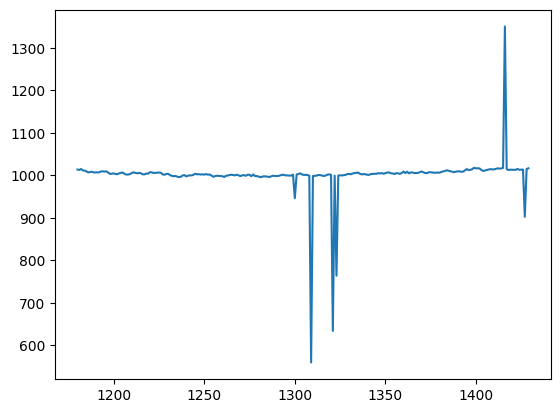

In [11]:
plt.plot(climate_train_data['meanpressure'].iloc[1180:1430])
plt.show()

In [12]:
# I remove the some particular indices, replace NaN and then linear interpolate
climate_train_data.loc[[1182, 1255, 1300, 1309, 1321, 1323, 1362, 1416, 1427], 'meanpressure'] = np.nan

# Verify if the values have been set to NaN
print(climate_train_data.loc[[1182, 1255, 1300, 1309, 1321, 1323, 1362, 1416, 1427], 'meanpressure'])

# Interpolate the NaN values in the 'meanpressure' column
climate_train_data['meanpressure'] = climate_train_data['meanpressure'].interpolate(method = 'linear')

# Verify if NaN values have been interpolated
print(climate_train_data.loc[[1182, 1255, 1300, 1309, 1321, 1323, 1362, 1416, 1427], 'meanpressure'])



1182   NaN
1255   NaN
1300   NaN
1309   NaN
1321   NaN
1323   NaN
1362   NaN
1416   NaN
1427   NaN
Name: meanpressure, dtype: float64
1182    1012.062500
1255     998.732143
1300    1001.750000
1309     998.812500
1321    1000.178571
1323     999.402116
1362    1005.052019
1416    1016.115385
1427    1014.295455
Name: meanpressure, dtype: float64


#### **Visualize the data after data preprocessing**


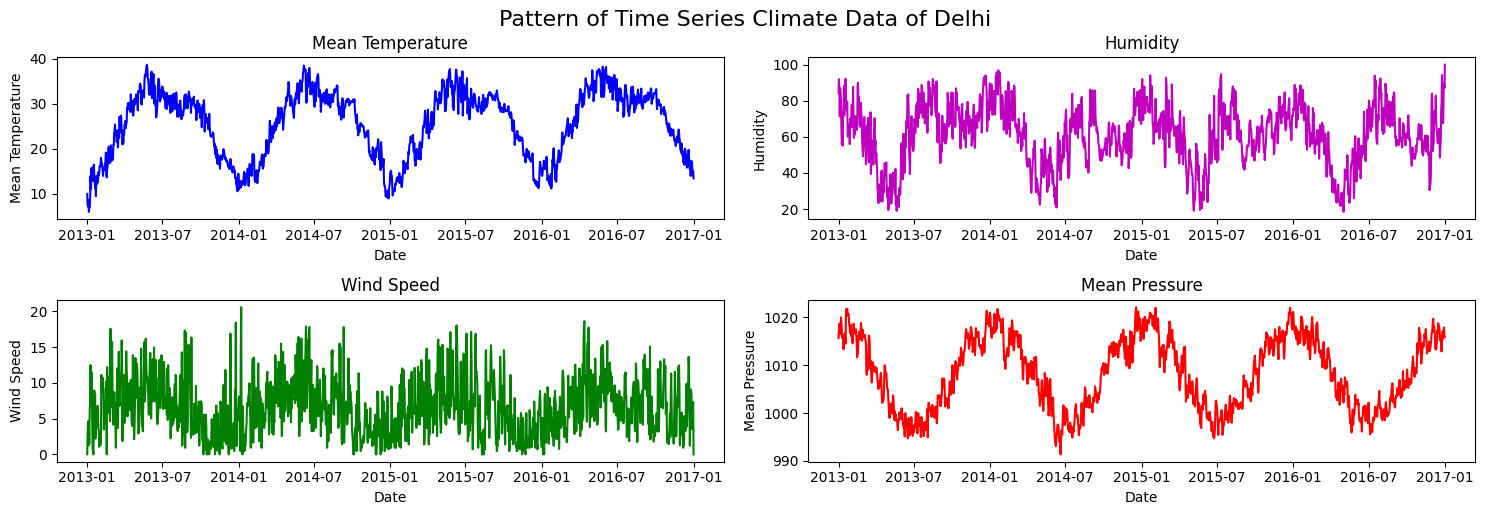

In [13]:
import matplotlib.pyplot as plt

# Convert the 'date' column to datetime if not already done
climate_train_data['date'] = pd.to_datetime(climate_train_data['date'])

# Define the figure and subplots (2 rows, 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(15, 5))

# Plot each feature in a separate subplot with different colors
axs[0, 0].plot(climate_train_data['date'], climate_train_data['meantemp'], color='b')
axs[0, 0].set_title('Mean Temperature')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Mean Temperature')

axs[0, 1].plot(climate_train_data['date'], climate_train_data['humidity'], color='m')
axs[0, 1].set_title('Humidity')
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('Humidity')

axs[1, 0].plot(climate_train_data['date'], climate_train_data['wind_speed'], color='g')
axs[1, 0].set_title('Wind Speed')
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('Wind Speed')

axs[1, 1].plot(climate_train_data['date'], climate_train_data['meanpressure'], color='r')
axs[1, 1].set_title('Mean Pressure')
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('Mean Pressure')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.suptitle('Pattern of Time Series Climate Data of Delhi', fontsize=16, y=1.02)
plt.show()



After processing the outliers, we visualized the data again and observed that the outliers have been successfully removed.

#### **Seasonal decomposition**

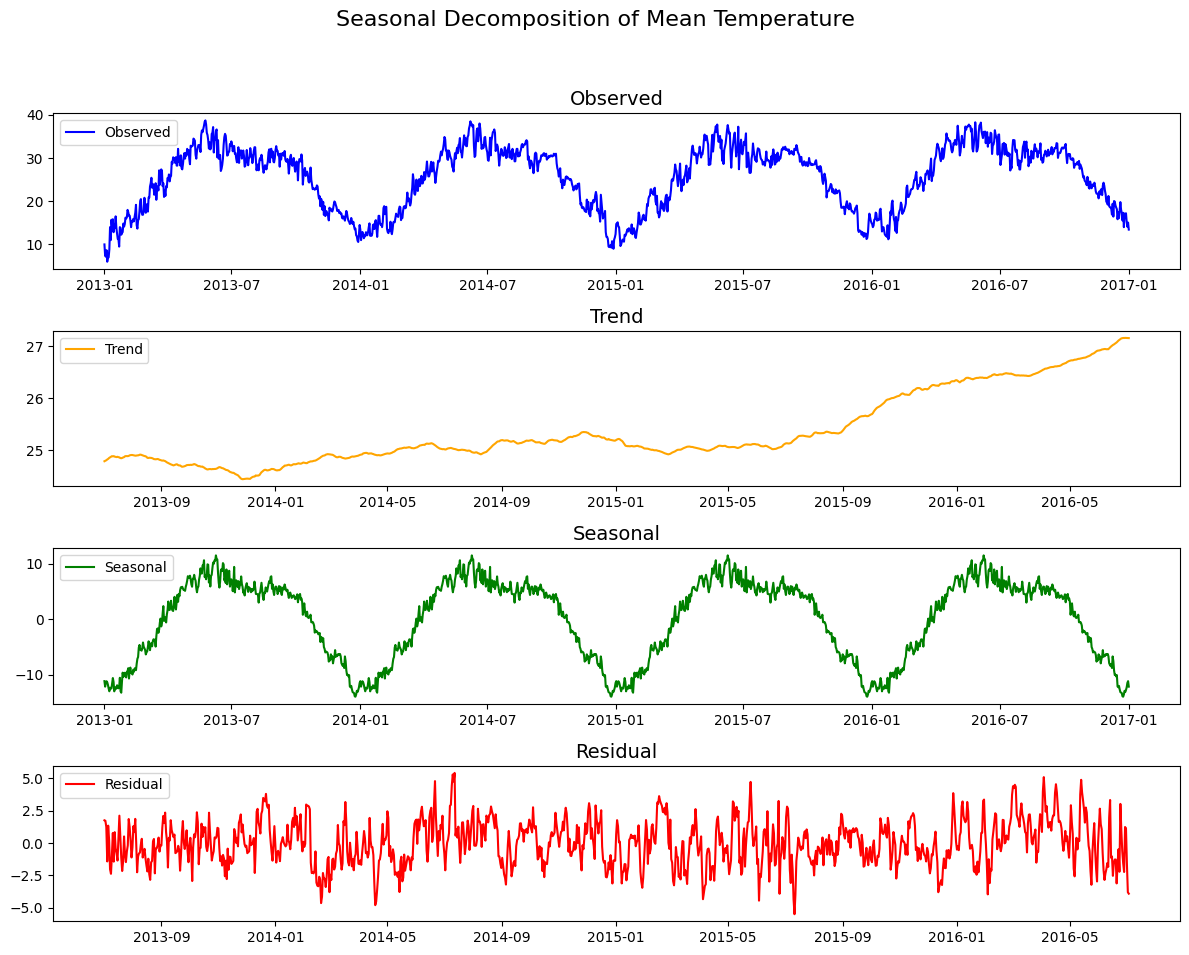

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Decompose the 'meantemp' time series
decomposition = seasonal_decompose(climate_train_data['meantemp'], period=365, model='additive')

# Create a figure for the plots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 10))

# Define the date index
climate_train_data['date'] = pd.to_datetime(climate_train_data['date'])
#date_index = climate_train_data['date'].index

# Plot each component with titles and date as x-axis
axes[0].plot(climate_train_data['date'], decomposition.observed, label='Observed', color='blue')
axes[0].set_title('Observed', fontsize=14)
axes[0].legend(loc='upper left')

axes[1].plot(climate_train_data['date'], decomposition.trend, label='Trend', color='orange')
axes[1].set_title('Trend', fontsize=14)
axes[1].legend(loc='upper left')

axes[2].plot(climate_train_data['date'], decomposition.seasonal, label='Seasonal', color='green')
axes[2].set_title('Seasonal', fontsize=14)
axes[2].legend(loc='upper left')

axes[3].plot(climate_train_data['date'], decomposition.resid, label='Residual', color='red')
axes[3].set_title('Residual', fontsize=14)
axes[3].legend(loc='upper left')

# Add a main title
plt.suptitle('Seasonal Decomposition of Mean Temperature', fontsize=16)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


Seasonal decomposition is a powerful technique for analyzing time series data by breaking it down into its fundamental components: observed values, trend, seasonality, and residuals. Here, each component is explained below.

- Identifying Trends: By isolating the trend component, we can observe the long-term progression of the data, helping us determine whether it is increasing, decreasing, or remaining stable over time.

- Understanding Seasonality: The seasonal component highlights recurring patterns or cycles that occur at specific intervals (such as every six months). This allows us to identify predictable fluctuations in the data, which may result from external factors.

- Analyzing Residuals: The residual component captures the irregularities or noise in the data after accounting for trend and seasonal effects. By analyzing the residuals, we can identify anomalies or outliers that warrant further investigation.

Overall, seasonal decomposition provides valuable insights into the underlying behaviors of time series data, facilitating more informed analysis and decision-making.

### **Correlation heatmap**

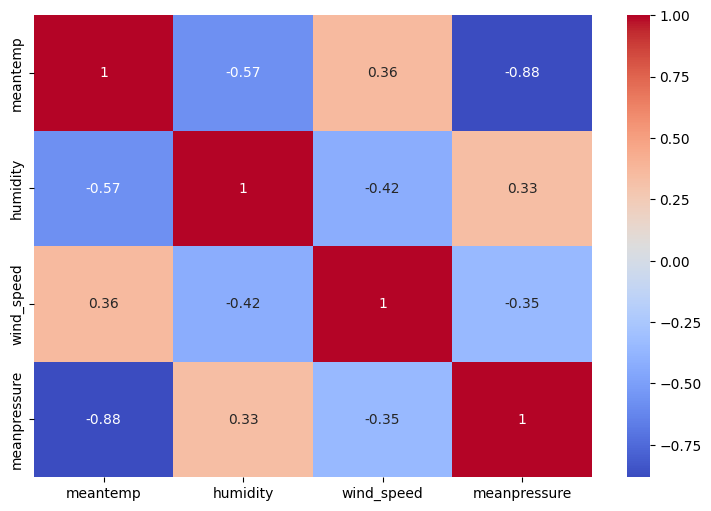

In [15]:
plt.figure(figsize=(9, 6))

# Selecting the required columns for correlation
subset_1 = climate_train_data[['meantemp', 'humidity', 'wind_speed', 'meanpressure']]

# Plotting the correlation heatmap
sns.heatmap(subset_1.corr(), annot=True, cmap='coolwarm')

plt.show()


The correlation heatmap is a graphical representation of the correlation matrix, showing the strength and direction of relationships between the variables.


#### **Normalize the data**

In [16]:
from sklearn.preprocessing import StandardScaler

# Define the columns to scale
columns = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the selected columns and transform the data
climate_train_data[columns] = scaler.fit_transform(climate_train_data[columns])

# Check the scaled data
print(climate_train_data[columns].head())


   meantemp  humidity  wind_speed  meanpressure
0 -2.110815  1.430090   -1.658894      0.997540
1 -2.464758  1.881103   -0.909332      1.284804
2 -2.496522  1.580428   -0.493468      1.401505
3 -2.292324  0.638311   -1.348673      1.199522
4 -2.655342  1.570405   -0.728230      1.109752


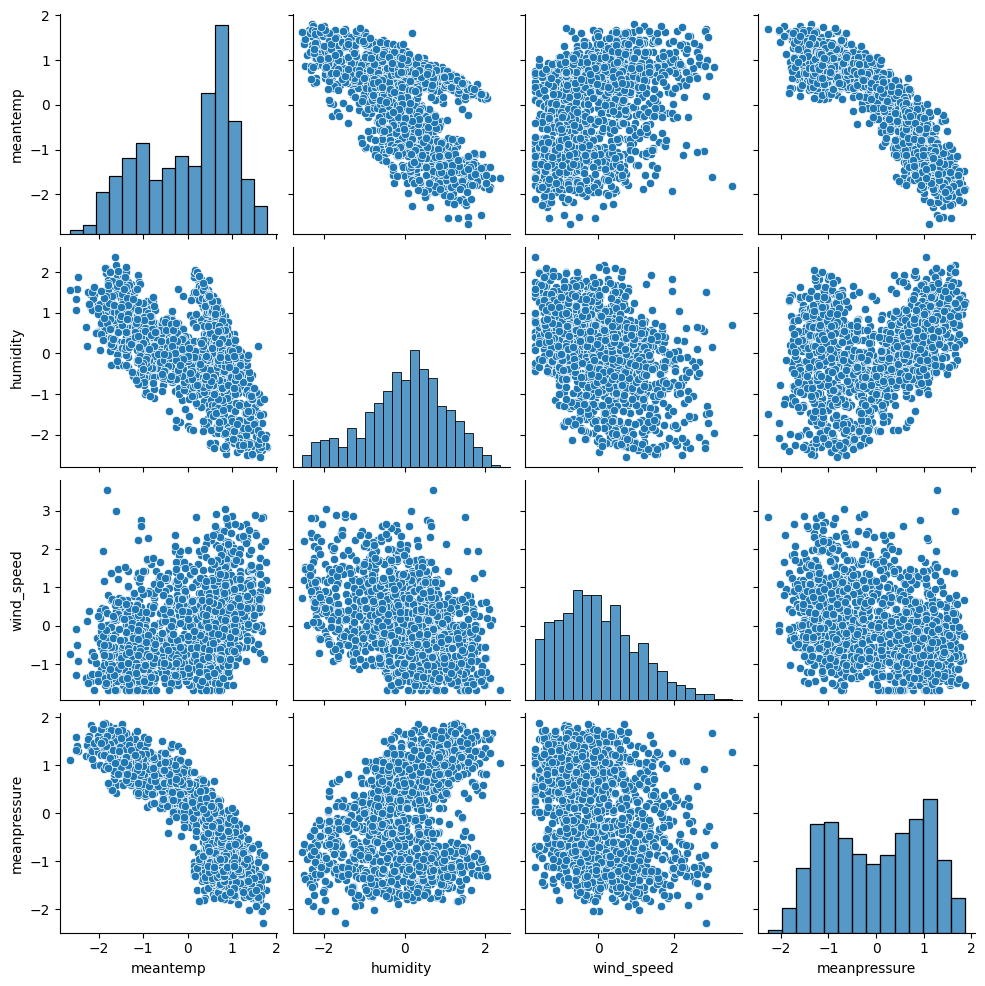

In [17]:
# after data preprocessing pairplot of all numerical variables
sns.pairplot(climate_train_data)

After preprocessing the training dataset, we again visualize the four numerical variables using pair plots to examine their relationships and distributions.

## **Test Data**

In [18]:
climate_test_df = df_test.copy()

### **Missing data**

In [19]:
climate_test_df.isnull().sum()

,0
date,0
meantemp,0
humidity,0
wind_speed,0
meanpressure,0


In [20]:
climate_test_df.dtypes

,0
date,object
meantemp,float64
humidity,float64
wind_speed,float64
meanpressure,float64


### **visualize the test data**

In [21]:
climate_test_df.columns

Index(['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')

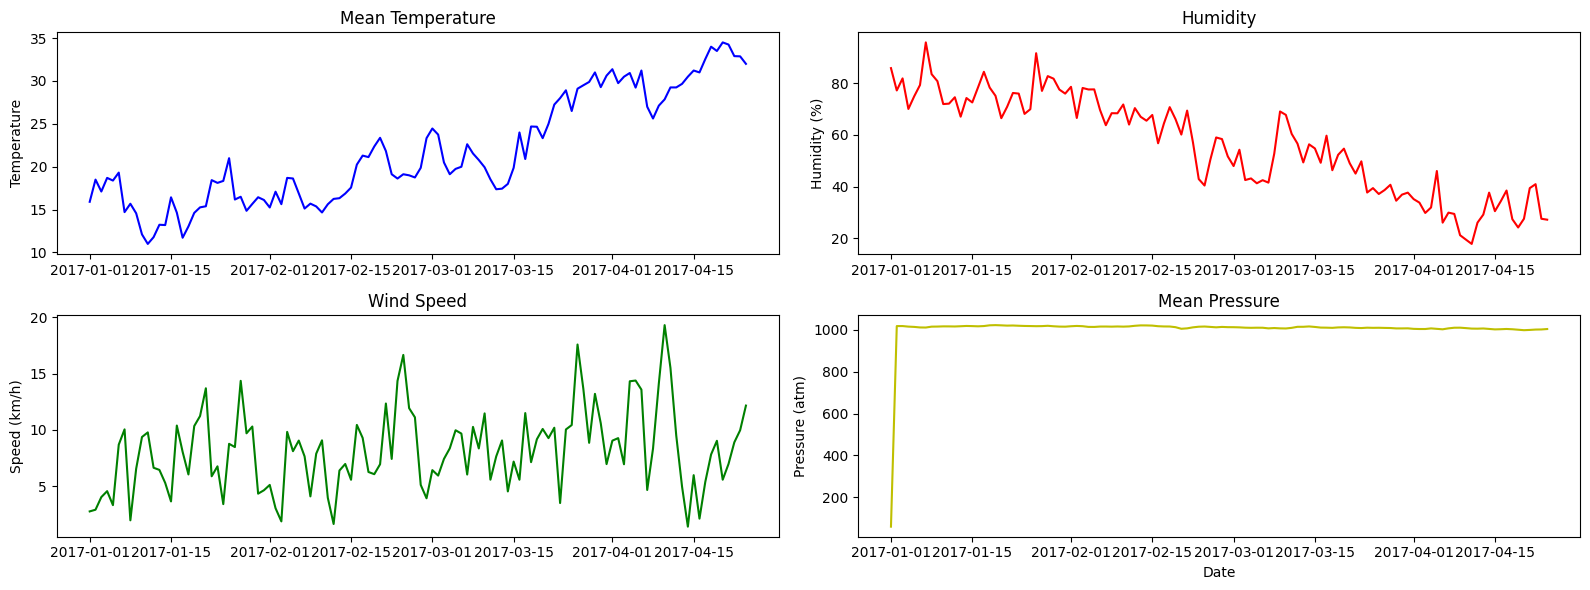

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'date' column to datetime if not already done
climate_test_df['date'] = pd.to_datetime(climate_test_df['date'], dayfirst = True)
#climate_test_df.set_index('date', inplace=True)

# Create subplots: 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(16, 6))

# Plot 'mean_temp'
axs[0, 0].plot(climate_test_df['date'], climate_test_df['meantemp'], color='b')
axs[0, 0].set_title('Mean Temperature')
axs[0, 0].set_ylabel('Temperature')

# Plot 'humidity' using the date index
axs[0, 1].plot(climate_test_df['date'], climate_test_df['humidity'], color='r')
axs[0, 1].set_title('Humidity')
axs[0, 1].set_ylabel('Humidity (%)')

# Plot 'wind_speed' using the date index
axs[1, 0].plot(climate_test_df['date'], climate_test_df['wind_speed'], color='g')
axs[1, 0].set_title('Wind Speed')
axs[1, 0].set_ylabel('Speed (km/h)')

# Plot 'meanpressure' using the date index
axs[1, 1].plot(climate_test_df['date'], climate_test_df['meanpressure'], color='y')
axs[1, 1].set_title('Mean Pressure')
axs[1, 1].set_ylabel('Pressure (atm)')
axs[1, 1].set_xlabel('Date')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


After visualizing the test dataset, I observed that the data requires preprocessing before applying the models.

 **Process the outliers of test data**

In [23]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

class TestOutlierProcessor(BaseEstimator, TransformerMixin):
    def __init__(self, columns, threshold=2, window_size=30):
        self.columns = columns
        self.threshold = threshold
        self.window_size = window_size
        self.outliers = {}
        self.bounds = {}
        self.input_data = {}
        self.output_data = {}

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy, self.outliers, self.bounds = self.detect_and_process_local_outliers(X_copy, self.columns)
        return X_copy

    def detect_and_process_local_outliers(self, X, columns):
        X_copy = X.copy()
        outliers_dict = {}
        bounds_dict = {}

        for col in columns:
            self.input_data[col] = X_copy[col].copy()  # Store the input data for this column

            # Step 1: Compute initial rolling statistics (mean, std) and bounds
            rolling_mean = X_copy[col].rolling(window=self.window_size, min_periods=1, center=True).mean()
            rolling_std = X_copy[col].rolling(window=self.window_size, min_periods=1, center=True).std()

            lower_bounds = rolling_mean - self.threshold * rolling_std
            upper_bounds = rolling_mean + self.threshold * rolling_std
            bounds_dict[col] = (lower_bounds, upper_bounds)

            # Step 2: Detect outliers using z-scores
            z_scores = (X_copy[col] - rolling_mean) / rolling_std
            outlier_mask = np.abs(z_scores) > self.threshold
            outliers_dict[col] = X_copy.loc[outlier_mask, col].dropna().index.tolist()

            # Step 3: Recompute rolling statistics excluding detected outliers
            for index in outliers_dict[col]:
                # Temporarily exclude the outlier from the column data for recomputation
                temp_data = X_copy[col].copy()
                temp_data.loc[index] = np.nan  # Exclude the outlier by setting it to NaN temporarily

                # Recompute rolling mean and std excluding the outlier
                rolling_mean_excluded = temp_data.rolling(window=self.window_size, min_periods=1, center=True).mean()
                rolling_std_excluded = temp_data.rolling(window=self.window_size, min_periods=1, center=True).std()

                # Recompute bounds excluding the outlier
                lower_bounds_excluded = rolling_mean_excluded - self.threshold * rolling_std_excluded
                upper_bounds_excluded = rolling_mean_excluded + self.threshold * rolling_std_excluded

                bounds_dict[col] = (lower_bounds_excluded, upper_bounds_excluded)

                # Adjust the outlier by setting it to the closest bound
                if abs(X_copy.loc[index, col] - lower_bounds_excluded.iloc[index]) < abs(upper_bounds_excluded.iloc[index] - X_copy.loc[index, col]):
                    X_copy.loc[index, col] = lower_bounds_excluded.iloc[index]
                else:
                    X_copy.loc[index, col] = upper_bounds_excluded.iloc[index]

            self.output_data[col] = X_copy[col].copy()  # Store the output data for this column

        self.outliers = outliers_dict
        self.bounds = bounds_dict
        return X_copy, self.outliers, self.bounds

    def get_local_outliers_indices(self, column):
        return self.outliers.get(column, [])

    def get_bounds(self, column):
        return self.bounds.get(column, (None, None))

    def get_input_data(self, column):
        return self.input_data.get(column, None)

    def get_output_data(self, column):
        return self.output_data.get(column, None)


In [24]:
climate_test_df.dtypes

,0
date,datetime64[ns]
meantemp,float64
humidity,float64
wind_speed,float64
meanpressure,float64


In [25]:
# copy the data
climate_test_data = climate_test_df.copy()
columns = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']
test_outlier_processor = TestOutlierProcessor(columns)
climate_test_data = test_outlier_processor.fit_transform(climate_test_data)


# Check how many rows remain after outlier removal
print(climate_test_data.shape)

(114, 5)


In [26]:
climate_test_data

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,1011.516289
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


In [27]:
climate_test_df.columns

Index(['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')

### **Data visualization after preprocessing**



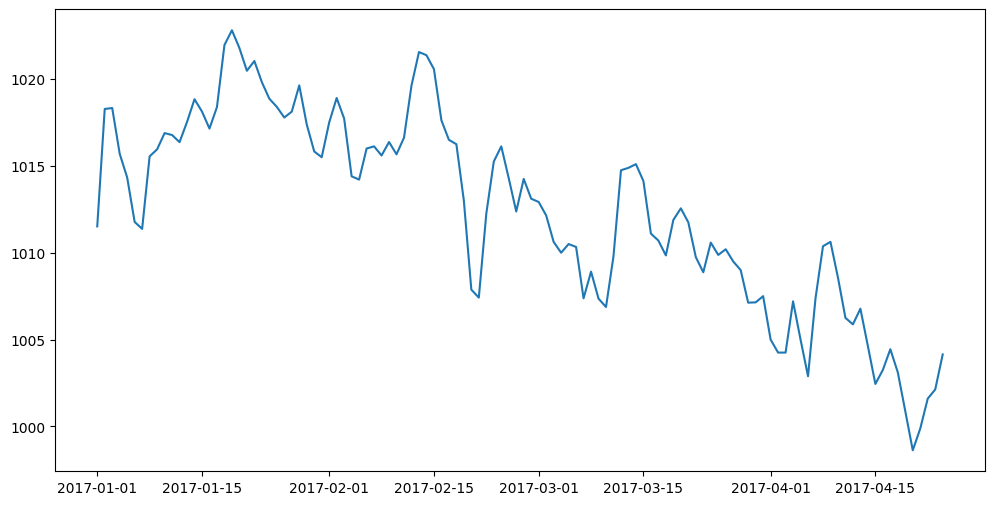

In [28]:
climate_test_data['date'] = pd.to_datetime(climate_test_data['date'], dayfirst = True)
plt.figure(figsize=(12, 6))
plt.plot(climate_test_data['date'], climate_test_data['meanpressure'])

In the `climate_test_data`, the variable 'meanpressure' contains outliers.  Initially, the outliers are processed and then visualize.

### **Normalize the data**

In [29]:
# Define the columns to normalize
columns_to_normalize = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the test data
climate_test_data[columns_to_normalize] = scaler.fit_transform(climate_test_data[columns_to_normalize])

# Check the standardized test data
print(climate_test_data[columns_to_normalize].head())

   meantemp  humidity  wind_speed  meanpressure
0 -0.913584  1.595877   -1.567265     -0.156901
1 -0.505291  1.132830   -1.522813      1.044052
2 -0.724496  1.382720   -1.192374      1.053920
3 -0.473725  0.748772   -1.036806      0.586196
4 -0.522827  1.010860   -1.403397      0.343453


### **Monthly Average Temparature**

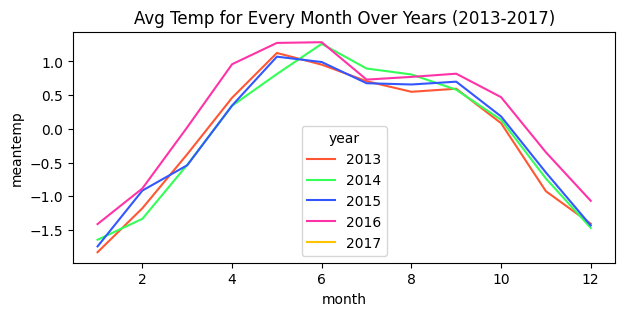

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract year and month from the date column
climate_train_data['year'] = climate_train_data['date'].dt.year
climate_train_data['month'] = climate_train_data['date'].dt.month

# Define a custom bright color palette
bright_palette = sns.color_palette(['#FF5733', '#33FF57', '#3357FF', '#FF33A8', '#FFC300'])  # 5 bright colors

# Plotting
plt.figure(figsize=(7, 3))
sns.lineplot(data=climate_train_data, x='month', y='meantemp', hue='year', palette=bright_palette, errorbar=None)
plt.title('Avg Temp for Every Month Over Years (2013-2017)')
plt.show()


## **Target variable**

In [31]:
target_variable = climate_train_data['meantemp']

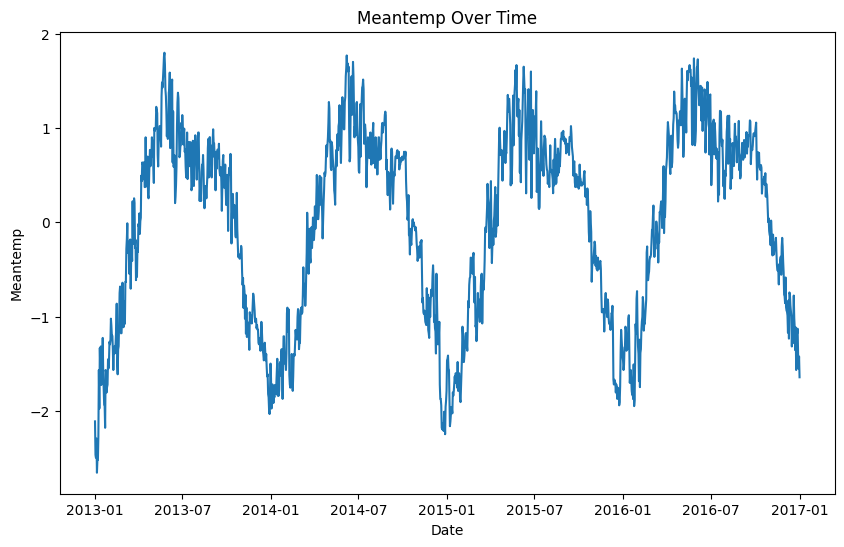

In [32]:
import matplotlib.pyplot as plt

# Assuming meantemp is in climate_train_data
plt.figure(figsize=(10, 6))
plt.plot(climate_train_data['date'], climate_train_data['meantemp'])
plt.title('Meantemp Over Time')
plt.xlabel('Date')
plt.ylabel('Meantemp')
plt.show()


### **Autocorrelation Function (ACF)**

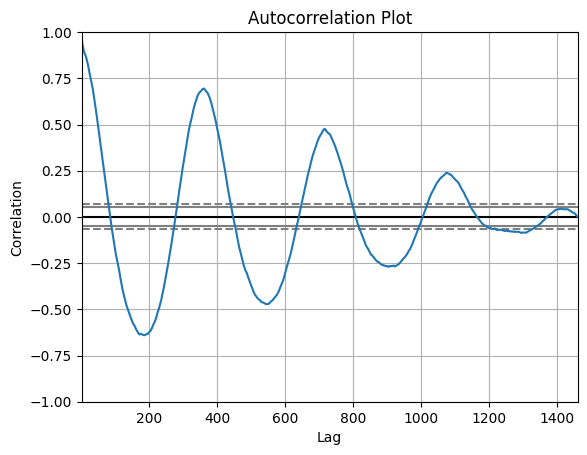

In [33]:
pd.plotting.autocorrelation_plot(climate_train_data['meantemp'])
plt.title('Autocorrelation Plot')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.show()

**Explanation of auto-correlation plot:**

**x-axis:** The x-axis of the plot represents the lagged time periods. It typically shows a range of lag values (e.g., 0 to 200).

**y-axis:** The y-axis shows the correlation coefficients for each lag. The height of the bars (or the points) indicates the strength and direction of the autocorrelation.

**Confidence Intervals:** The dashed lines (often at ±2 standard errors) provide a confidence interval. If the autocorrelation value for a particular lag exceeds these bounds, it suggests a statistically significant correlation at that lag.

**Significant Autocorrelation:** If the autocorrelation is significantly positive at certain lags, it indicates that past values have a strong influence on future values, which can be useful for forecasting. Conversely, significant negative autocorrelation indicates a tendency for values to oscillate.

**Decay Pattern:** In many time series, autocorrelation decreases gradually with increasing lags (exponential decay), which may suggest the presence of a trend or seasonality.

If autocorrelation drops to zero quickly, it may indicate a more random process.

**Seasonality:**Regular peaks at specific lags (e.g., every 12 lags in monthly data) suggest seasonal patterns, indicating that the time series exhibits cyclical behavior.

### **Split the data**

In [34]:
### prepare the data

# Split data into features and target for training and testing
X_train = climate_train_data[['meanpressure', 'humidity', 'wind_speed']]
y_train = climate_train_data['meantemp']
X_test = climate_test_data[['meanpressure', 'humidity', 'wind_speed']]
y_test = climate_test_data['meantemp']

## **Model**

Since our climate data exhibits non-linear patterns, traditional linear time series models may not be appropriate. Therefore, I applied several machine learning models, including Random Forest, Extreme Gradient Boosting (XGBoost), and Support Vector Machine (SVM), as well as deep learning models like simple Neural Networks (NN), Recurrent Neural Networks (RNN), Convolutional Neural Networks (CNN), Long Short-Term Memory (LSTM), Bi-directional LSTM, and Gated Recurrent Units (GRU). Additionally, I included Facebook’s Prophet model to explore its effectiveness with non-linear time series. The models were then compared to identify the best fit for our dataset.



### **RFR**

Unlike traditional time series models, RFR does not require stationarity. As RFR is a non-parametric model, so it can capture complex, non-linear relationships in the data. By using multiple decision trees, Random Forest reduces overfitting and improves generalizability, which is beneficial for prediction accuracy.

In [35]:
pip install matplotlib

Random Forest Regressor Evaluation:
Mean Absolute Error (MAE): 0.460185137098742
Mean Squared Error (MSE): 0.32775673381115666
Root Mean Squared Error (RMSE): 0.572500422542339
R-squared (R²): 0.6722432661888433


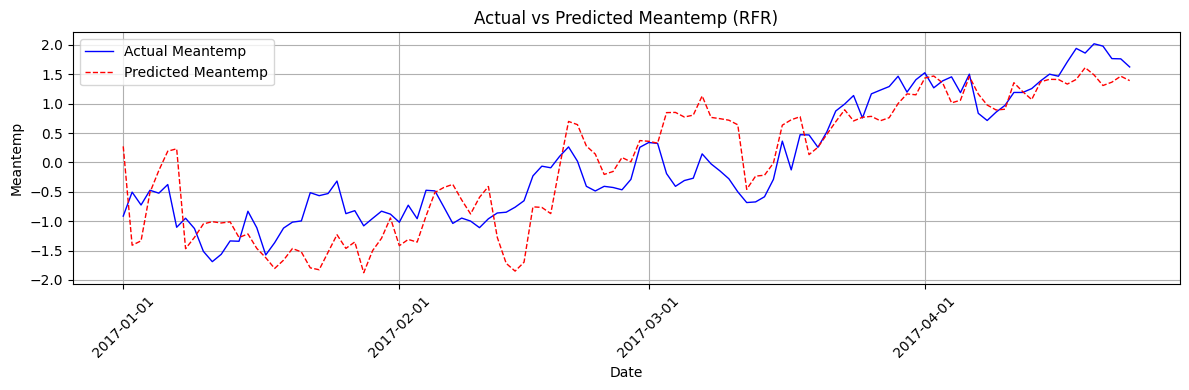

In [36]:
### Initialize and Fit the Model
import matplotlib.dates as mdates

# Initialize the Random Forest Regressor with parameters
rfr_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training set
rfr_model.fit(X_train, y_train)

### make prediction on test set

# Predict the 'meantemp' for the test data
y_pred_rfr = rfr_model.predict(X_test)

### Evaluate model performance

# Predict the 'meantemp' for the test data
mae_rfr = mean_absolute_error(y_test, y_pred_rfr)
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
rmse_rfr = np.sqrt(mse_rfr)
r2_rfr = r2_score(y_test, y_pred_rfr)

# Print the evaluation metrics
print("Random Forest Regressor Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_rfr}")
print(f"Mean Squared Error (MSE): {mse_rfr}")
print(f"Root Mean Squared Error (RMSE): {rmse_rfr}")
print(f"R-squared (R²): {r2_rfr}")

### line plot of the actual vs. predicted values
# Convert date column in test data to datetime
climate_test_data['date'] = pd.to_datetime(climate_test_data['date'], dayfirst = True)

# Plotting the results
plt.figure(figsize=(12, 4))
plt.plot(climate_test_data['date'], y_test, label='Actual Meantemp', color='blue', linestyle='-', linewidth=1)
plt.plot(climate_test_data['date'], y_pred_rfr, label='Predicted Meantemp', color='red', linestyle='--', linewidth=1)

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Meantemp')
plt.title('Actual vs Predicted Meantemp (RFR)')
plt.legend()
plt.grid(True)

# Rotate and format the x-axis dates
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.tight_layout()
plt.show()



### **XGBoost**


XGBoost also captures complex relationships through boosted decision trees, handling patterns that linear models might miss. Its regularization and optimization techniques also help prevent overfitting, leading to better generalization on unseen data.

In [37]:
pip install xgboost

XGBoost Regressor Initial Evaluation:
Mean Absolute Error (MAE): 0.4491873615329191
Mean Squared Error (MSE): 0.31375285450458745
Root Mean Squared Error (RMSE): 0.5601364606099013
R-squared (R²): 0.6862471454954124


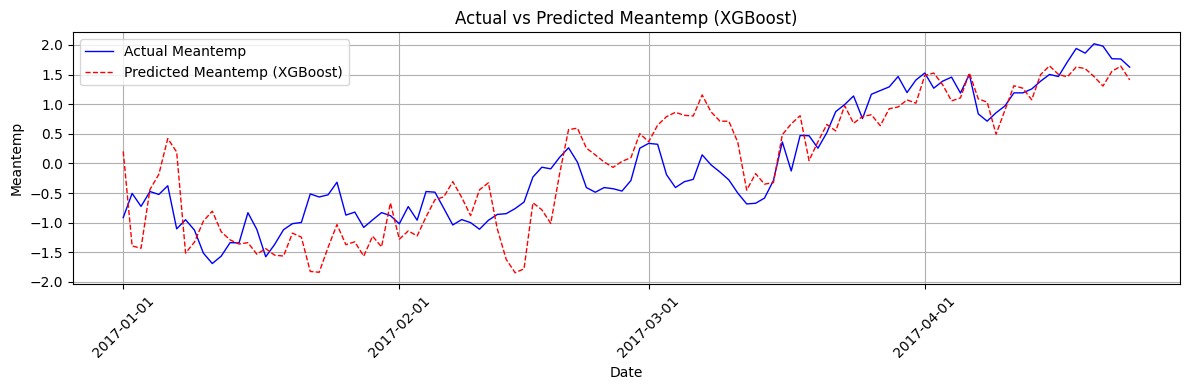

In [38]:
import xgboost as xgb
from xgboost import XGBRegressor

### Initial XGBoost Model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate the initial model
y_pred_xgb = xgb_model.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)


# Print the evaluation metrics
print("XGBoost Regressor Initial Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_xgb}")
print(f"Mean Squared Error (MSE): {mse_xgb}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb}")
print(f"R-squared (R²): {r2_xgb}")

### Plotting Actual vs Predicted
plt.figure(figsize=(12, 4))

# Plot actual values
plt.plot(climate_test_data['date'], y_test, label='Actual Meantemp', color='blue', linestyle='-', linewidth=1)
# Plot predicted values
plt.plot(climate_test_data['date'], y_pred_xgb, label='Predicted Meantemp (XGBoost)', color='red', linestyle='--', linewidth=1)

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Meantemp')
plt.title('Actual vs Predicted Meantemp (XGBoost)')
plt.legend()
plt.grid(True)

# Rotate and format the x-axis dates
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.tight_layout()
plt.show()


### **SVM**

Support Vector Machine (SVM) is also effective for non-linear time series data because it uses kernel functions to transform data into higher dimensions, allowing it to capture complex patterns and relationships.

SVM Regressor Initial Evaluation:
Mean Absolute Error (MAE): 0.41922330166483074
Mean Squared Error (MSE): 0.2725646245876277
Root Mean Squared Error (RMSE): 0.5220772209047505
R-squared (R²): 0.7274353754123722


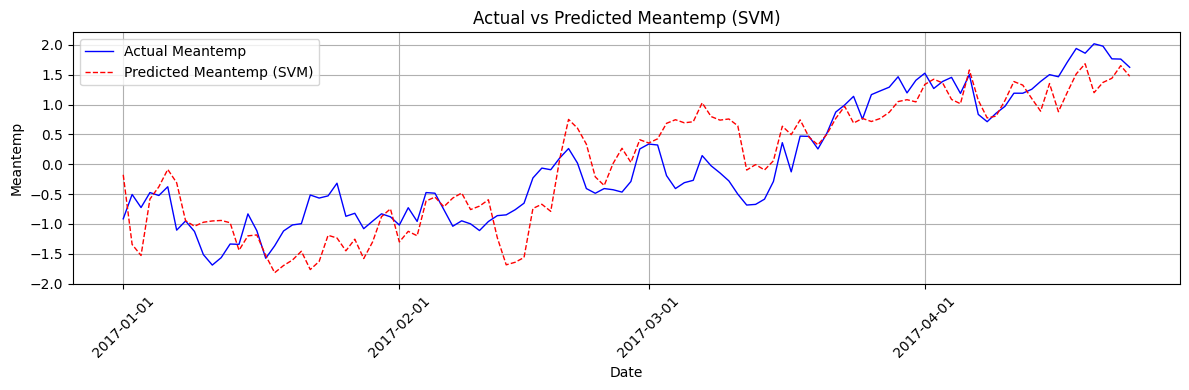

In [39]:
from sklearn.svm import SVR

### Initial SVM Regression Model
svm_model = SVR(kernel='rbf')  # You can choose different kernels such as 'linear', 'poly', etc.
svm_model.fit(X_train, y_train)

# Predict and evaluate the initial model
y_pred_svm = svm_model.predict(X_test)
mae_svm = mean_absolute_error(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print("SVM Regressor Initial Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_svm}")
print(f"Mean Squared Error (MSE): {mse_svm}")
print(f"Root Mean Squared Error (RMSE): {rmse_svm}")
print(f"R-squared (R²): {r2_svm}")

### Plotting Actual vs Predicted
plt.figure(figsize=(12, 4))

# Plot actual values
plt.plot(climate_test_data['date'], y_test, label='Actual Meantemp', color='blue', linestyle='-', linewidth=1)
# Plot predicted values
plt.plot(climate_test_data['date'], y_pred_svm, label='Predicted Meantemp (SVM)', color='red', linestyle='--', linewidth=1)

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Meantemp')
plt.title('Actual vs Predicted Meantemp (SVM)')
plt.legend()
plt.grid(True)

# Rotate and format the x-axis dates
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.tight_layout()
plt.show()


### **SImple NN**

A simple Neural Network (NN) model is important for non-linear time series data as it can capture basic non-linear patterns without the complexity of recurrent structures, providing a baseline for comparison with more advanced models. This simplicity allows it to efficiently handle straightforward relationships in the data, making it useful as an initial approach.

In [40]:
pip install tensorflow

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Neural Network Regressor Initial Evaluation:
Mean Absolute Error (MAE): 0.40975614223247814
Mean Squared Error (MSE): 0.26791146270375144
Root Mean Squared Error (RMSE): 0.5176016448039471
R-squared (R²): 0.7320885372962485


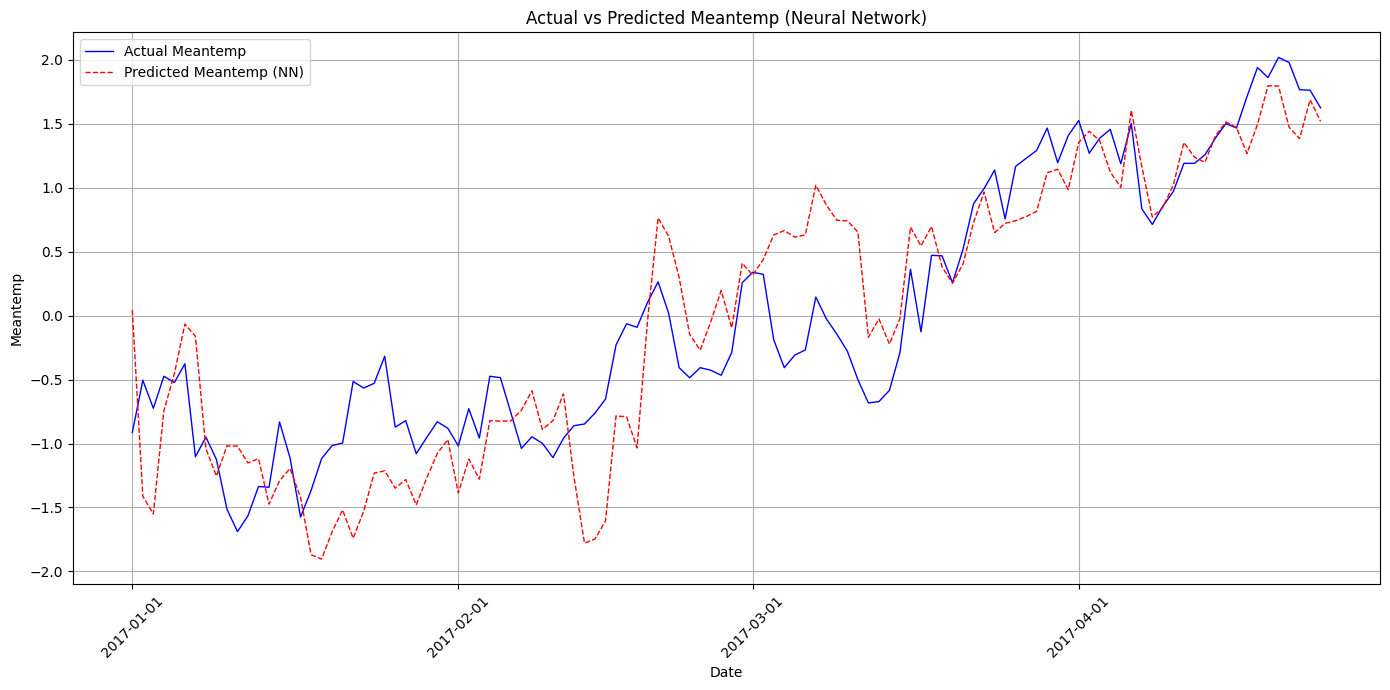

In [41]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Initial Neural Network Model
nn_model = Sequential()
nn_model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))  # Input layer
nn_model.add(Dense(32, activation='relu'))  # Hidden layer
nn_model.add(Dense(1))  # Output layer

# Compile the model
nn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
nn_model.fit(X_train_scaled, y_train, epochs=110, batch_size=50, verbose=0)  # Adjust epochs and batch size as needed

# Predict and evaluate the initial model
y_pred_nn = nn_model.predict(X_test_scaled)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
mse_nn = mean_squared_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mse_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print("Neural Network Regressor Initial Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_nn}")
print(f"Mean Squared Error (MSE): {mse_nn}")
print(f"Root Mean Squared Error (RMSE): {rmse_nn}")
print(f"R-squared (R²): {r2_nn}")


### Plotting Actual vs Predicted for Initial Model
# Convert date column in test data to datetime if it's not already
climate_test_data['date'] = pd.to_datetime(climate_test_data['date'], dayfirst=True)

plt.figure(figsize=(14, 7))

# Plot initial model predictions
plt.plot(climate_test_data['date'], y_test, label='Actual Meantemp', color='blue', linestyle='-', linewidth=1)
plt.plot(climate_test_data['date'], y_pred_nn, label='Predicted Meantemp (NN)', color='red', linestyle='--', linewidth=1)

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Meantemp')
plt.title('Actual vs Predicted Meantemp (Neural Network)')
plt.legend()
plt.grid(True)

# Rotate and format the x-axis dates
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.tight_layout()
plt.show()


### **CNN**

For non-linear time series data, Convolutional Neural Networks (CNNs) are effective because they can capture local patterns and dependencies within the data by applying filters, making them useful for identifying complex patterns and trends across short time windows. Additionally, CNNs are computationally efficient, allowing for faster processing of time series data compared to some other deep learning models.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 3, 64)           │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 26, 3, 32)           │           6,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2496)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │          39,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,401 (181.25 KB)

 Trainable params: 46,401 (181.25 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0911 - val_loss: 0.0125
Epoch 2/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0129 - val_loss: 0.0095
Epoch 3/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0086 - val_loss: 0.0052
Epoch 4/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0086 - val_loss: 0.0062
Epoch 5/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0062 - val_loss: 0.0062
Epoch 6/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0053 - val_loss: 0.0045
Epoch 7/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0053 - val_loss: 0.0038
Epoch 8/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0052 - val_loss: 0.0048
Epoch 9/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0060 - val_loss: 0.0063
Epoch 10/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0050 - val_loss: 0.0049
Epoch 11/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0043 - val_loss: 0.0048
Epoch 12/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 

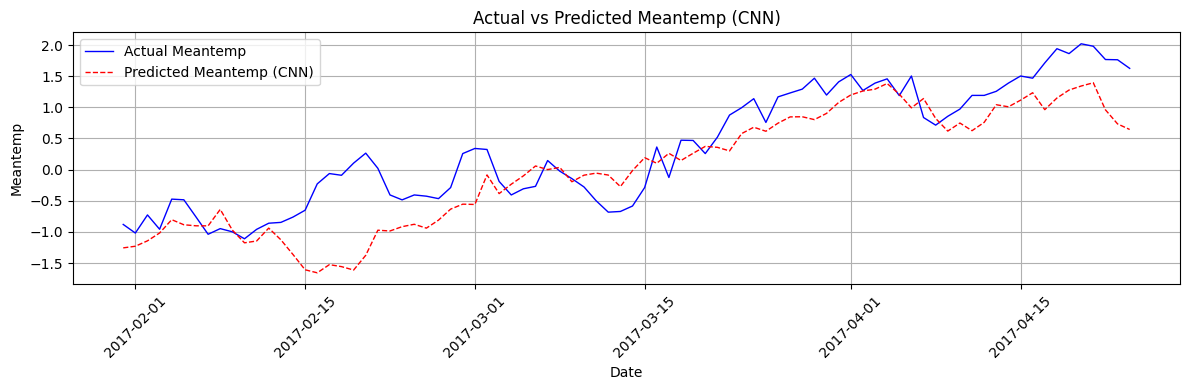

In [42]:
# Import necessary libraries
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler


# Prepare data for CNN
# Scaling data for better performance with neural networks
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(climate_train_data[['meantemp', 'meanpressure', 'humidity', 'wind_speed']])
scaled_test = scaler.transform(climate_test_data[['meantemp', 'meanpressure', 'humidity', 'wind_speed']])

# Define function to create sequences for CNN input
def create_sequences(data, target_column, sequence_length=30):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length, 1:])  # Use predictors
        y.append(data[i + sequence_length, target_column])  # Target variable
    return np.array(X), np.array(y)

# Set the target column index for 'meantemp'
target_column = 0
sequence_length = 30  # Define sequence length

# Create sequences for training and testing
X_train, y_train = create_sequences(scaled_train, target_column, sequence_length)
X_test, y_test = create_sequences(scaled_test, target_column, sequence_length)

# Reshape for CNN: (samples, time steps, features, 1) for 1D CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

# Build the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 1), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)),
    tf.keras.layers.Conv2D(32, (3, 1), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
print(model.summary())

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1, verbose=1)

# Predict and inverse transform the predictions
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(np.concatenate([y_pred_scaled, np.zeros((len(y_pred_scaled), X_test.shape[2]))], axis=1))[:, 0]
y_test_actual = scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((len(y_test), X_test.shape[2]))], axis=1))[:, 0]

# Evaluate the model
mae_cnn = mean_absolute_error(y_test_actual, y_pred)
mse_cnn = mean_squared_error(y_test_actual, y_pred)
rmse_cnn = np.sqrt(mse_cnn)
r2_cnn = r2_score(y_test_actual, y_pred)

print("CNN Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_cnn}")
print(f"Mean Squared Error (MSE): {mse_cnn}")
print(f"Root Mean Squared Error (RMSE): {rmse_cnn}")
print(f"R-squared (R²): {r2_cnn}")


# Plotting Actual vs Predicted values
plt.figure(figsize=(12, 4))

# Plot actual test values
plt.plot(climate_test_data['date'][sequence_length:], y_test_actual, label='Actual Meantemp', color='blue', linestyle='-', linewidth=1)

# Plot CNN predicted values
plt.plot(climate_test_data['date'][sequence_length:], y_pred, label='Predicted Meantemp (CNN)', color='red', linestyle='--', linewidth=1)

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Meantemp')
plt.title('Actual vs Predicted Meantemp (CNN)')
plt.legend()
plt.grid(True)

# Rotate and format the x-axis dates
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### **RNN**
Recurrent Neural Networks (RNNs) are important for non-linear time series data because they can capture complex temporal dependencies by maintaining hidden states across sequences. Their ability to process and learn from sequential information makes them well-suited for modeling patterns that vary over time.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 64)                  │           4,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,473 (21.38 KB)

 Trainable params: 5,473 (21.38 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0779 - val_loss: 0.0041
Epoch 2/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0054 - val_loss: 0.0023
Epoch 3/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0037 - val_loss: 0.0024
Epoch 4/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0037 - val_loss: 0.0020
Epoch 5/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0030 - val_loss: 0.0027
Epoch 6/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0030 - val_loss: 0.0024
Epoch 7/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0031 - val_loss: 0.0036
Epoch 8/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0030 - val_loss: 0.0022
Epoch 9/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0029 - val_loss: 0.0018
Epoch 10/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0026 - val_loss: 0.0015
Epoch 11/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0030 - val_loss: 0.0021
Epoch 12/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.002

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
RNN Model Evaluation:
Mean Absolute Error (MAE): 0.258
Mean Squared Error (MSE): 0.095
Root Mean Squared Error (RMSE): 0.308
R-squared (R²): 0.890


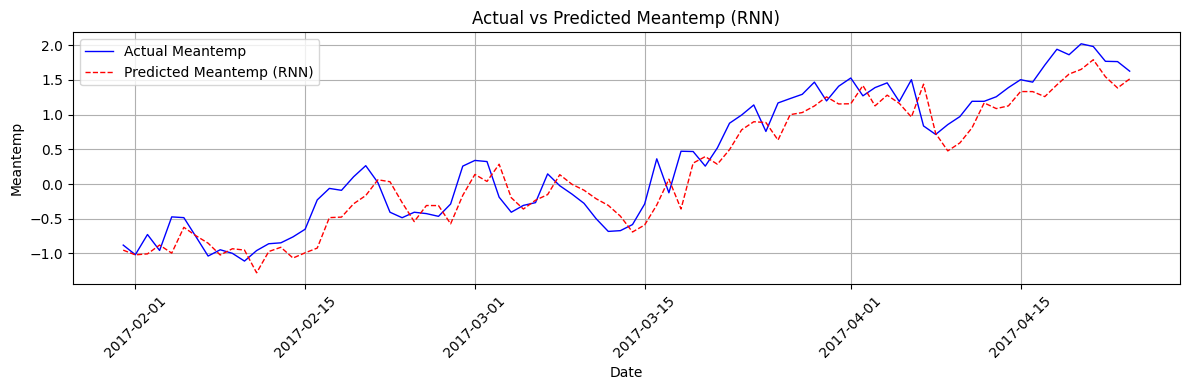

In [43]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Prepare data for RNN
# Scaling data for better performance with neural networks
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(climate_train_data[['meantemp', 'meanpressure', 'humidity', 'wind_speed']])
scaled_test = scaler.transform(climate_test_data[['meantemp', 'meanpressure', 'humidity', 'wind_speed']])

# Define function to create sequences for RNN input
def create_sequences(data, target_column, sequence_length=30):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length, :])  # Use all features
        y.append(data[i + sequence_length, target_column])  # Target variable
    return np.array(X), np.array(y)

# Set the target column index for 'meantemp'
target_column = 0
sequence_length = 30  # Define sequence length

# Create sequences for training and testing
X_train, y_train = create_sequences(scaled_train, target_column, sequence_length)
X_test, y_test = create_sequences(scaled_test, target_column, sequence_length)

# Build the RNN model
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),  # RNN layer
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
print(model.summary())

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1, verbose=1)

# Predict and inverse transform the predictions
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(np.concatenate([y_pred_scaled, np.zeros((len(y_pred_scaled), scaled_test.shape[1]-1))], axis=1))[:, 0]
y_test_actual = scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((len(y_test), scaled_test.shape[1]-1))], axis=1))[:, 0]

# Evaluate the model
mae_rnn = mean_absolute_error(y_test_actual, y_pred)
mse_rnn = mean_squared_error(y_test_actual, y_pred)
rmse_rnn = np.sqrt(mse_rnn)
r2_rnn = r2_score(y_test_actual, y_pred)

print("RNN Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_rnn:.3f}")
print(f"Mean Squared Error (MSE): {mse_rnn:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rnn:.3f}")
print(f"R-squared (R²): {r2_rnn:.3f}")

# Plotting Actual vs Predicted values
plt.figure(figsize=(12, 4))

# Plot actual test values
plt.plot(climate_test_data['date'][sequence_length:], y_test_actual, label='Actual Meantemp', color='blue', linestyle='-', linewidth=1)

# Plot RNN predicted values
plt.plot(climate_test_data['date'][sequence_length:], y_pred, label='Predicted Meantemp (RNN)', color='red', linestyle='--', linewidth=1)

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Meantemp')
plt.title('Actual vs Predicted Meantemp (RNN)')
plt.legend()
plt.grid(True)

# Rotate and format the x-axis dates
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


I have also applied three different types of RNN models: Long Short-Term Memory (LSTM), Bi-directional LSTM, and Gated Recurrent Units (GRU).

#### **LSTM model**

The LSTM model is also important for non-linear time series data because it effectively captures long-term dependencies and intricate patterns within sequences, making it well-suited for forecasting tasks. Its ability to retain and utilize information over extended periods allows it to model complex relationships that traditional methods may overlook.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 64)              │          17,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,369 (118.63 KB)

 Trainable params: 30,369 (118.63 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0799 - val_loss: 0.0089
Epoch 2/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0072 - val_loss: 0.0104
Epoch 3/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0072 - val_loss: 0.0061
Epoch 4/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0061 - val_loss: 0.0067
Epoch 5/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0065 - val_loss: 0.0049
Epoch 6/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0054 - val_loss: 0.0061
Epoch 7/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0072 - val_loss: 0.0081
Epoch 8/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0054 - val_loss: 0.0057
Epoch 9/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0056 - val_loss: 0.0040
Epoch 10/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0053 - val_loss: 0.0047
Epoch 11/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0051 - val_loss: 0.0047
Epoch 12/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss

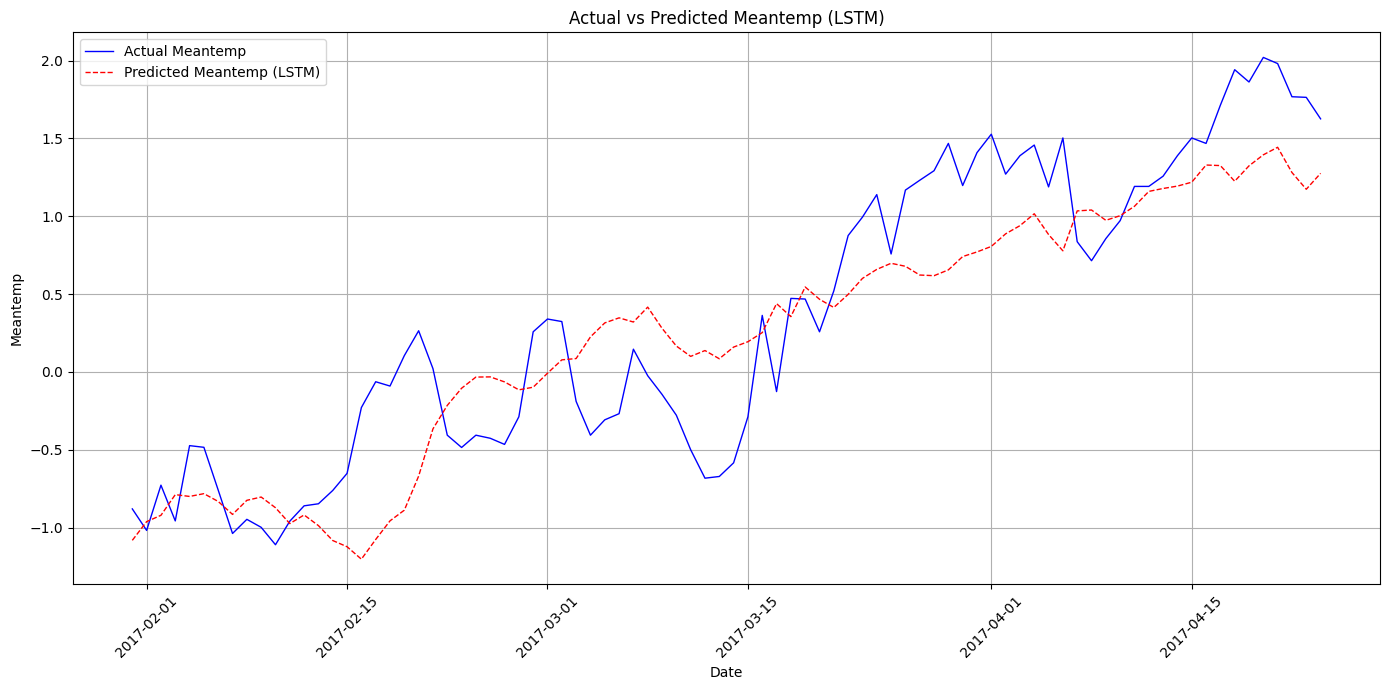

In [44]:
# Prepare data for LSTM
# Scaling data for better performance with neural networks
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(climate_train_data[['meantemp', 'meanpressure', 'humidity', 'wind_speed']])
scaled_test = scaler.transform(climate_test_data[['meantemp', 'meanpressure', 'humidity', 'wind_speed']])

# Define function to create sequences for LSTM input
def create_sequences(data, target_column, sequence_length=30):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length, 1:])  # Use predictors
        y.append(data[i + sequence_length, target_column])  # Target variable
    return np.array(X), np.array(y)

# Set the target column index for 'meantemp'
target_column = 0
sequence_length = 30  # Define sequence length

# Create sequences for training and testing
X_train, y_train = create_sequences(scaled_train, target_column, sequence_length)
X_test, y_test = create_sequences(scaled_test, target_column, sequence_length)

# Build the LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.LSTM(32, return_sequences=False),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)  # Final output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
print(model.summary())

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1, verbose=1)

# Predict and inverse transform the predictions
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(np.concatenate([y_pred_scaled, np.zeros((len(y_pred_scaled), X_test.shape[2]))], axis=1))[:, 0]
y_test_actual = scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((len(y_test), X_test.shape[2]))], axis=1))[:, 0]

# Evaluate the model
mae_lstm = mean_absolute_error(y_test_actual, y_pred)
mse_lstm = mean_squared_error(y_test_actual, y_pred)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_test_actual, y_pred)

print("LSTM Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_lstm}")
print(f"Mean Squared Error (MSE): {mse_lstm}")
print(f"Root Mean Squared Error (RMSE): {rmse_lstm}")
print(f"R-squared (R²): {r2_lstm}")

# Plotting Actual vs Predicted values
plt.figure(figsize=(14, 7))

# Plot actual test values
plt.plot(climate_test_data['date'][sequence_length:], y_test_actual, label='Actual Meantemp', color='blue', linestyle='-', linewidth=1)

# Plot LSTM predicted values
plt.plot(climate_test_data['date'][sequence_length:], y_pred, label='Predicted Meantemp (LSTM)', color='red', linestyle='--', linewidth=1)

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Meantemp')
plt.title('Actual vs Predicted Meantemp (LSTM)')
plt.legend()
plt.grid(True)

# Rotate and format the x-axis dates
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### **Bi-directional LSTM**
Bi-directional LSTM models for non-linear time series data capture contextual information from both past and future sequences, enhancing the model's ability to understand complex temporal patterns. This dual perspective allows for more accurate predictions, especially in tasks where future context is as crucial as past context.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 30, 128)             │          34,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 64)                  │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 77,089 (301.13 KB)

 Trainable params: 77,089 (301.13 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 13s 72ms/step - loss: 0.0978 - val_loss: 0.0107
Epoch 2/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0097 - val_loss: 0.0070
Epoch 3/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0069 - val_loss: 0.0086
Epoch 4/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - loss: 0.0069 - val_loss: 0.0062
Epoch 5/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0066 - val_loss: 0.0043
Epoch 6/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0052 - val_loss: 0.0059
Epoch 7/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 0.0056 - val_loss: 0.0062
Epoch 8/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 0.0066 - val_loss: 0.0047
Epoch 9/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0051 - val_loss: 0.0062
Epoch 10/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - loss: 0.0049 - val_loss: 0.0068
Epoch 11/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.0055 - val_loss: 0.0040
Epoch 12/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - los

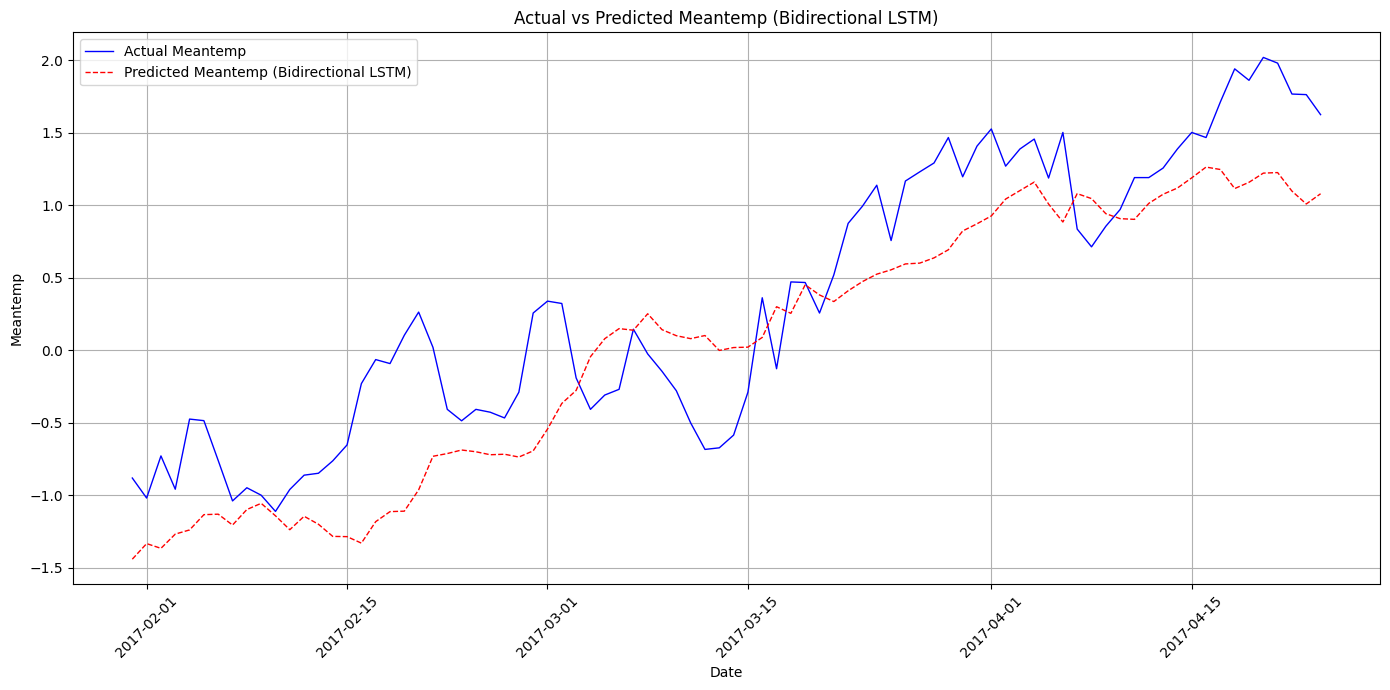

In [45]:
# Prepare data for Bidirectional LSTM
# Scale data for better performance with neural networks
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(climate_train_data[['meantemp', 'meanpressure', 'humidity', 'wind_speed']])
scaled_test = scaler.transform(climate_test_data[['meantemp', 'meanpressure', 'humidity', 'wind_speed']])

# Function to create sequences
def create_sequences(data, target_column, sequence_length=30):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length, 1:])  # Use predictors only
        y.append(data[i + sequence_length, target_column])  # Target variable
    return np.array(X), np.array(y)

# Set the target column index for 'meantemp'
target_column = 0
sequence_length = 30  # Define sequence length

# Create sequences for training and testing
X_train, y_train = create_sequences(scaled_train, target_column, sequence_length)
X_test, y_test = create_sequences(scaled_test, target_column, sequence_length)

# Reshape for LSTM input: (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Build the Bidirectional LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
print(model.summary())

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1, verbose=1)

# Predict and inverse transform the predictions
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(np.concatenate([y_pred_scaled, np.zeros((len(y_pred_scaled), X_test.shape[2]))], axis=1))[:, 0]
y_test_actual = scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((len(y_test), X_test.shape[2]))], axis=1))[:, 0]

# Evaluate the model
mae_bilstm = mean_absolute_error(y_test_actual, y_pred)
mse_bilstm = mean_squared_error(y_test_actual, y_pred)
rmse_bilstm = np.sqrt(mse_bilstm)
r2_bilstm = r2_score(y_test_actual, y_pred)

print("Bidirectional LSTM Model Evaluation:")
print(f"MAE: {mae_bilstm}, MSE: {mse_bilstm}, RMSE: {rmse_bilstm}, R2: {r2_bilstm}")

# Plotting Actual vs Predicted values
plt.figure(figsize=(14, 7))

# Plot actual test values
plt.plot(climate_test_data['date'][sequence_length:], y_test_actual, label='Actual Meantemp', color='blue', linestyle='-', linewidth=1)

# Plot Bidirectional LSTM predicted values
plt.plot(climate_test_data['date'][sequence_length:], y_pred, label='Predicted Meantemp (Bidirectional LSTM)', color='red', linestyle='--', linewidth=1)

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Meantemp')
plt.title('Actual vs Predicted Meantemp (Bidirectional LSTM)')
plt.legend()
plt.grid(True)

# Rotate and format the x-axis dates
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### **GRU**

The Gated Recurrent Unit (GRU) model effectively captures complex patterns and dependencies while being computationally efficient with fewer parameters than LSTM. Its gating mechanisms help to retain relevant information and forget irrelevant data, making it well-suited for learning from sequential data.

In [46]:
## Define features and target

# Assuming your data is already loaded into climate_train_data and climate_test_data
train_data = climate_train_data[['date', 'meanpressure', 'humidity', 'wind_speed', 'meantemp']]
test_data = climate_test_data[['date', 'meanpressure', 'humidity', 'wind_speed', 'meantemp']]

# Ensure date is in datetime format and set it as index (if needed)
train_data['date'] = pd.to_datetime(train_data['date'])
test_data['date'] = pd.to_datetime(test_data['date'])
train_data.set_index('date', inplace=True)
test_data.set_index('date', inplace=True)

# Split features and target
X_train = train_data[['meanpressure', 'humidity', 'wind_speed']].values
y_train = train_data['meantemp'].values
X_test = test_data[['meanpressure', 'humidity', 'wind_speed']].values
y_test = test_data['meantemp'].values

## Create time series data
def create_sequences(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 1  # Adjust this based on how many previous time steps you want to use
X_train_seq, y_train_seq = create_sequences(X_train, y_train, time_steps)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, time_steps)


<ipython-input-46-0c2451c6d8ed>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['date'] = pd.to_datetime(train_data['date'])


In [47]:
## Build GRU model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

## Create the model
model = Sequential()
model.add(GRU(50, return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
model.add(Dropout(0.2))
model.add(GRU(50))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer for regression


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.8120 - val_loss: 0.3827
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2430 - val_loss: 0.1550
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1620 - val_loss: 0.1630
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1470 - val_loss: 0.1566
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1538 - val_loss: 0.1482
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1641 - val_loss: 0.1562
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1649 - val_loss: 0.1505
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1508 - val_loss: 0.1446
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1533 - val_loss: 0.1631
Epoch 10/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1835 - val_loss: 0.1448
Epoch 11/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1546 - val_loss: 0.1495
Epoch 12/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0

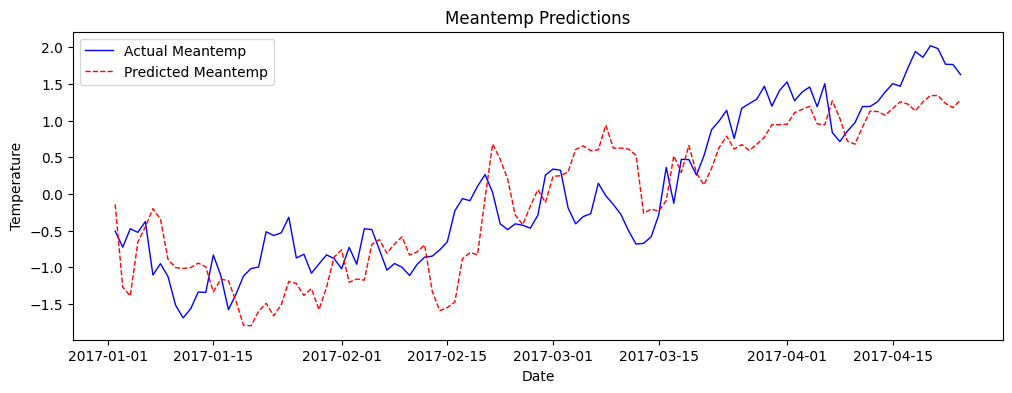

In [48]:
## Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

## train the model
model.fit(X_train_seq, y_train_seq, epochs=100, batch_size=32, validation_split=0.2)

## Evaluate the model
y_train_pred = model.predict(X_train_seq)
y_test_pred = model.predict(X_test_seq)

#Evaluation
mae_gru = mean_absolute_error(y_test_seq, y_test_pred)
mse_gru = mean_squared_error(y_test_seq, y_test_pred)
rmse_gru = np.sqrt(mse_gru)
r2_gru = r2_score(y_test_seq, y_test_pred)

# Print the results
print(f' GRU MAE: {mae_gru}')
print(f'GRU MSE: {mse_gru}')
print(f'GRU RMSE: {rmse_gru}')
print(f'GRU R²: {r2_gru}')

## plot the actual and predicted value
plt.figure(figsize=(12, 4))
plt.plot(test_data.index[time_steps:], y_test_seq, label='Actual Meantemp', color='blue', linestyle='-', linewidth=1)
plt.plot(test_data.index[time_steps:], y_test_pred, label='Predicted Meantemp', color='red', linestyle='--', linewidth=1)
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Meantemp Predictions')
plt.legend()
plt.show()

### **Propet model**
The Prophet model effectively captures seasonality and trends, making it robust to missing data and outliers.

DEBUG:cmdstanpy:input tempfile: /tmp/tmprx8z3m5n/0ktver45.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprx8z3m5n/me2w6gc1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42673', 'data', 'file=/tmp/tmprx8z3m5n/0ktver45.json', 'init=/tmp/tmprx8z3m5n/me2w6gc1.json', 'output', 'file=/tmp/tmprx8z3m5n/prophet_modellmia1wdn/prophet_model-20241101135350.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:53:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:53:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet Model Evaluation:
Mean Absolute Error (MAE): 0.4247898233341928
Mean Squared Error (MSE): 0.2731991478061565
Root Mean Squared Error (RMSE): 0.5226845586069637
R-squared (R²): 0.7268008521938435


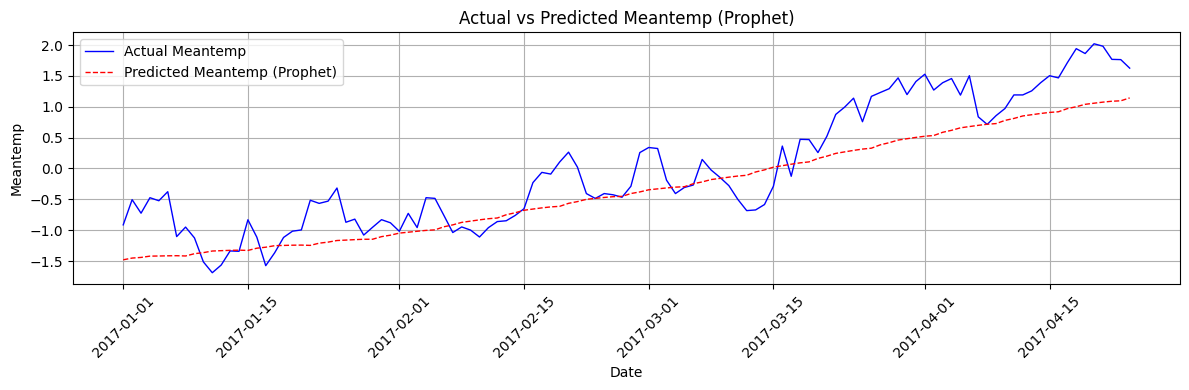

In [49]:
# Import necessary libraries
from prophet import Prophet

# Prepare data for Prophet
# Prophet expects two columns: 'ds' for date and 'y' for the target variable
prophet_data = climate_train_data[['date', 'meantemp']].copy()
prophet_data.columns = ['ds', 'y']  # Rename columns to fit Prophet's requirements

# Initialize and fit the Prophet model
prophet_model = Prophet(daily_seasonality=True, yearly_seasonality=True)
prophet_model.fit(prophet_data)

# Make a DataFrame for future dates
future_dates = climate_test_data[['date']].copy()
future_dates.columns = ['ds']  # Prophet expects the column name to be 'ds'

# Forecast the future dates
forecast = prophet_model.predict(future_dates)

# Evaluation metrics
y_pred_prophet = forecast['yhat'].values
y_test = climate_test_data['meantemp'].values

mae_prophet = mean_absolute_error(y_test, y_pred_prophet)
mse_prophet = mean_squared_error(y_test, y_pred_prophet)
rmse_prophet = np.sqrt(mse_prophet)
r2_prophet = r2_score(y_test, y_pred_prophet)

print("Prophet Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_prophet}")
print(f"Mean Squared Error (MSE): {mse_prophet}")
print(f"Root Mean Squared Error (RMSE): {rmse_prophet}")
print(f"R-squared (R²): {r2_prophet}")

# Plotting Actual vs Predicted
plt.figure(figsize=(12, 4))

# Plot actual data
plt.plot(climate_test_data['date'], y_test, label='Actual Meantemp', color='blue', linestyle='-', linewidth=1)

# Plot Prophet forecast
plt.plot(climate_test_data['date'], y_pred_prophet, label='Predicted Meantemp (Prophet)', color='red', linestyle='--', linewidth=1)

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Meantemp')
plt.title('Actual vs Predicted Meantemp (Prophet)')
plt.legend()
plt.grid(True)

# Rotate and format the x-axis dates
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## **Comparison of results**

In [50]:
# Example comparison dictionary
results = {
    'Model': ['RFR', 'XGBoost', 'SVM', 'Simple NN', 'RNN', 'CNN', 'Prophet', 'LSTM', 'Bi-LSTM', 'GRU'],
    'MAE': [mae_rfr, mae_xgb, mae_svm, mae_nn, mae_rnn, mae_cnn, mae_prophet, mae_lstm, mae_bilstm, mae_gru],
    'MSE': [mse_rfr, mse_xgb, mse_svm, mse_nn, mse_rnn, mse_cnn, mse_prophet, mse_lstm, mse_bilstm, mse_gru],
    'RMSE': [rmse_rfr, rmse_xgb, rmse_svm, rmse_nn, rmse_rnn, rmse_cnn, rmse_prophet, rmse_lstm, rmse_bilstm, rmse_gru],
    'R2': [r2_rfr, r2_xgb, r2_svm, r2_nn, r2_rnn, r2_cnn, r2_prophet, r2_lstm, r2_bilstm, r2_gru]
}
results_df = pd.DataFrame(results)

# sort the result
results_df.sort_values(by = 'R2', ascending=False).reset_index(drop=True)

,Model,MAE,MSE,RMSE,R2
0,RNN,0.257588,0.094856,0.307987,0.890412
1,LSTM,0.393188,0.218431,0.467366,0.747645
2,Simple NN,0.409756,0.267911,0.517602,0.732089
3,SVM,0.419223,0.272565,0.522077,0.727435
4,Prophet,0.424790,0.273199,0.522685,0.726801
5,XGBoost,0.449187,0.313753,0.560136,0.686247
6,GRU,0.478024,0.314718,0.560997,0.685722
7,RFR,0.460185,0.327757,0.572500,0.672243
8,Bi-LSTM,0.457503,0.289753,0.538287,0.665246
9,CNN,0.450589,0.337483,0.580933,0.610103


The table presents the performance metrics of various models applied to non-linear time series data. Among the models, RNN achieves the best performance with the lowest MAE (0.2185), MSE (0.0689), and RMSE (0.2625), along with a high R² value of 0.9204, indicating a strong fit to the data.